# Stanford CME 241 (Winter 2025) - Assignment 1

**Due: Sunday, January 19 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/cocosrv/technical-documents/blob/master/finance/cme241/assignments/Winter2025/assignment1.ipynb

*Group members (replace below names with people in your group):* 
- Person 1
- Person 2
- Person 3

## Imports

In [1]:
import sys 
sys.path.append('/Users/coren/RL-book')
!pip install graphviz
import graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


## Question 1: Snakes and Ladders (Led by ______)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image below for the locations of the snakes and ladders.

![Snakes and Laddders](./Figures/snakesAndLadders.png)

---

### Part (A) Answer

The state space $\mathcal{S}$ consists of all the squares on the board, with the starting position (0) and the terminal state (100). Therefore, $$ \mathcal{S} = \{0, 1, 2, \ldots, 100\} $$


### Part (B) Answer

The transition probabilities for each square can be described as follows:

For squares without any snakes or ladders, the probability of moving to any of the next six squares (or fewer if near the end of the board) is evenly distributed.
For squares containing a ladder, the player transitions directly to the square at the top of the ladder with probability 1.
For squares containing a snake, the player transitions directly to the square at the snake’s tail with probability 1.
For instance, if the player is on square 1, the transition probabilities are:

$P(2|1) = \frac{1}{6}$\
$P(3|1) = \frac{1}{6}$\
$P(4|1) = \frac{1}{6}$\
$P(5|1) = \frac{1}{6}$\
$P(6|1) = \frac{1}{6}$\
$P(7|1) = \frac{1}{6}$

More generally, for a player on square $k$, the probabilities are:

$P(k+1|k) = \frac{1}{6}$\
$P(k+2|k) = \frac{1}{6}$\
$P(k+3|k) = \frac{1}{6}$\
$P(k+4|k) = \frac{1}{6}$\
$P(k+5|k) = \frac{1}{6}$\
$P(k+6|k) = \frac{1}{6}$

If the player lands on square 4, which is the base of a ladder leading to square 14, the transition probability is:

$P(14|4) = 1$
Similarly, if the player is on square 34, which is the head of a snake leading to square 6, the transition probability is:

$P(6|34) = 1$
This can be summarized as:
$P(s'|s) = \frac{1}{6}$ if $s' = s + r$, where $r$ is the result of the dice roll.

For squares $s \geq 94$, the probabilities are adjusted to ensure the player does not exceed square 100. For example, if the player is on square 97, the transition probability to square 100 is:

$T(97, 100) = \frac{2}{6}$, as rolling a 3 or more would place the player at the final square.

### Part (C) Answer

In [2]:
import random
import matplotlib.pyplot as plt


snakes_ladders = {
    4: 14, 8: 20, 21: 42, 28: 76, 32: 10, 36: 6,
    48: 26, 50: 67, 62: 18, 71: 92, 80: 99, 88: 24,
    95: 56, 97: 78
}
        

from collections import defaultdict
from typing import Dict
from rl.distribution import Categorical
from rl.markov_process import NonTerminal, Terminal, FiniteMarkovProcess

def build_transition_map() -> Dict[int, Categorical[int]]:
    transition_map: Dict[int, Categorical[int]] = {}

    for s in range(100):
        outcomes = defaultdict(float)
        for roll in range(1, 7):
            next_sq = s + roll
            if next_sq >= 100:
                outcomes[100] += 1/6
            else:
                if next_sq in snakes_ladders:
                    next_sq = snakes_ladders[next_sq]
                outcomes[next_sq] += 1/6
        transition_map[s] = Categorical(outcomes)

    return transition_map

transition_map = build_transition_map()


snakes_ladders_mp = FiniteMarkovProcess(transition_map)
print(snakes_ladders_mp)


From State 0:
  To State 1 with Probability 0.167
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
From State 1:
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
From State 2:
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 20 with Probability 0.167
From State 3:
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 20 with Probability 0.167
  To State 9 with Probability 0.167
From State 4:
  To State 5 with Probability 0.167
  To State 6 with Probab

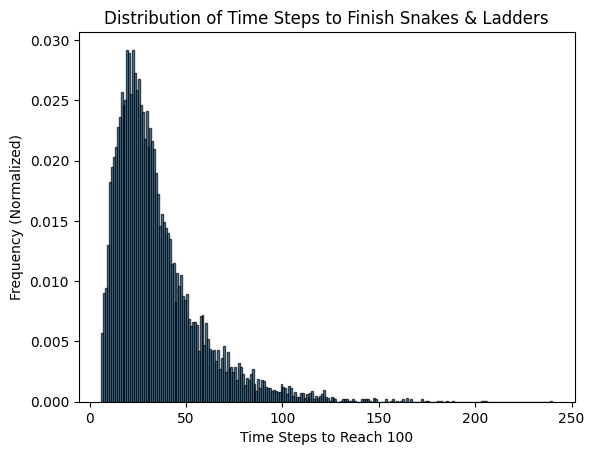

In [3]:
from rl.distribution import Constant

def simulate_single_game(mdp: FiniteMarkovProcess[int]) -> int:
    """
    Simulates one Snakes & Ladders game starting from state 0
    and returns the number of time-steps needed to reach terminal.
    """
    start_dist = Constant(NonTerminal(0))  
    trace_iter = mdp.simulate(start_dist) 
    steps = 0
    for state in trace_iter:

        if isinstance(state, Terminal):
            return steps
        steps += 1
    return steps


NUM_SIMULATIONS = 10_000
finishing_times = [
    simulate_single_game(snakes_ladders_mp) for _ in range(NUM_SIMULATIONS)
]

plt.hist(finishing_times, bins=range(min(finishing_times), max(finishing_times) + 2),
         alpha=0.7, edgecolor='black', density=True)
plt.xlabel("Time Steps to Reach 100")
plt.ylabel("Frequency (Normalized)")
plt.title("Distribution of Time Steps to Finish Snakes & Ladders")
plt.show()

## Question 2: Markov Decision Processes (Led by ______)

Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: 
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer



In order to compute $V^*(s)$ with the MDP State-Value Bellman Optimality Equation, we first need to compute $\mathcal{R}(s,a)$ and $\mathcal{P}(s,a,s')$
We have 
\begin{align*}
\mathcal{P}(s,a,s') &= \mathbb{P}(S_{t+1} = s'|S_t=s,A_t = a)\\
&= a \text{ for } s' = s+1\\
&= 1-a \text{ for } s' = s
\end{align*}
And 
\begin{align*}
\mathcal{R}(s,a) &= \displaystyle\sum_{s'\in\mathcal{S}}\mathcal{P}(s,a,s')\mathcal{R}_T(s,a,s')\\
&= \mathcal{P}(s,a,s)\mathcal{R}_T(s,a,s)+\mathcal{P}(s,a,s+1)\mathcal{R}_T(s,a,s+1)\\
&= (1-a)(1+a)+a(1-a)\\
&= (1-a)(1+2a)
\end{align*}
Then, according to Bellman optimality equation we have : 
$$V^*(s) = \underset{a\in[0,1]}{\max}\left\{(1-a)(1+2a)+\gamma (1-a)V^*(s)+\gamma aV^*(s+1)\right\}$$
Furthermore we should have $V^*(s) = V^*(s')$ because $\mathcal{R}(s,a)$ doesn't depend on the state $s$ and the same configuration but with a starting state of $s'$ instead of $1$ is exactly the same. Hence, we have 
$$V^*(s) = \underset{a\in[0,1]}{\max}\left\{(1-a)(1+2a)\right\}+\gamma V^*(s)$$
$$\Longrightarrow V^*(s) = \frac{9}{8(1-\gamma)} = \frac{9}{4}$$
Moreover, the optimal action $a^*$ which maximizes the optimal value function is $a^* = \frac{1}{4}$

### Part (B) Answer



According to the previous question an optimal deterministic policy is $\pi^*(s) = \frac{1}{4}$ 

### Part (C) Answer

#### Bellman Optimality Equation Change:
In this question, the actions can only be in $[0,\frac{1}{s}]$, so the Bellman Optimality Equation is changed like this : 
$$V^*(s) = \underset{a\in[0,\frac{1}{s}]}{\max}\left\{(1-a)(1+2a)+\gamma (1-a)V^*(s)+\gamma aV^*(s+1)\right\}$$

#### Optimal Value Function Change:
This time $V^*(s)$ depends on  $s$ but is decreasing, indeed we can't come back to a previous state and the constraints are only increased. Hence, using the Bellman equation we find that the optimal $a^*$ at state $s$ is given by 
$$a^* = \min\left(\frac{1}{s},\frac{1+\gamma[V^*(s+1)-V^*(s)]}{4}\right)\leq \frac{1}{4}$$
It makes sense that the optimal action is decreased because unlikely the first assumption, we would like to prevent the state to increase. Furthermore, at some point we will have $\forall s\geq s', \frac{1}{s}<\frac{1+\gamma[V^*(s+1)-V^*(s)]}{4}$, and $\forall s\geq s'$
\begin{align*}
V^*(s) = \left(1-\frac{1}{s}\right)\left(1+\frac{2}{s}\right)+\gamma\left(1-\frac{1}{s}\right)V^*(s)+\gamma\frac{1}{s}V^*(s+1)
\end{align*}
Thanks to this equation, we can deduce the following asymptotic devlopement $V^*(s) = 2+\frac{2}{s}+o\left(\frac{1}{s}\right)$ 

#### Optimal Policy Change:
As we have just seen the optimal policy is decreased compare to the first optimal policy and $\forall s\geq s', \pi^*(s)=\frac{1}{s}$

## Question 3: Frog in a Pond (Led by ______)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**. 

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)? 

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components: 

- **State Space**: Define the possible states of the MDP. 
- **Action Space**: Specify the actions available to the frog at each state. 
- **Transition Function**: Describe the probabilities of transitioning between states for each action. 
- **Reward Function**: Specify the reward associated with the states and transitions. 

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

After running the code, we observe the following graphs for $n=3$, $n=10$, and $n=25$:

![FrogGraphs](./Figures/frogGraphs.png)

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  

The state space consists of the positions of the frog on the lilypads. The frog can be on any lilypad from $0$ to $n$, so the state space is:
$$\mathcal{S} = \{0,1,...,n\}$$
Each state represents the frog's current position on the pond, the state $0$ and $n$ are terminal state.

#### Action Space:  

At each non-terminal state $i$, the frog has two possible actions :\
$\textbf{Action A}$ : move to $i-1$ with probability $\frac{i}{n}$ or to $i+1$ with probability $\frac{n-i}{i}$\
$\textbf{Action B}$ : move to any lilypad (except $i$) with probability $\frac{1}{n}$


#### Transition Function:  

We have for $1\leq i\leq n-1$
\begin{align*}
\mathcal{P}(i,A,i-1) &= \frac{i}{n}\\
\mathcal{P}(i,A,i+1) &= \frac{n-i}{n}\\
\mathcal{P}(i,B,j) &= \frac{1}{n}\mathbb{I}_{j\neq i}\\
\end{align*}

#### Reward Function:  

We know that $n$ and $0$ are terminal states, thus if we set $R_t(s) = 1 \text{ if }s = n \text{ else } 0$ and $\gamma = 1$, we indeed have 
\begin{align*}
\mathbb{E}(G_t) &= \displaystyle\sum_{t\geq 0}\mathbb{E}(R_t)\\
&=  \displaystyle\sum_{t\geq 0}\mathbb{P}(S_t = n)\\
&= \mathbb{P}(\text{reach }0\text{ before }n)\\
\end{align*}


### Part (B) Answer

In [4]:
MDPRefined = dict
def get_lily_pads_mdp(n: int) -> MDPRefined:
    data = {
        i: {
            'A': {
                i - 1: i/n,
                i + 1: (n-i)/n,
            },
            'B': {
                j: 1/n for j in range(n + 1) if j != i
            }
        } for i in range(1, n)
    }
    data[0] = {'A': {0: 1}, 'B': {0: 1}}
    data[n] = {'A': {n: 1}, 'B': {n: 1}}

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            value_A = (i / n) * vf[i-1] + ((n - i) / n) * vf[i+1]
            value_B = sum(vf[j] for j in range(n + 1) if j != i) / n
            vf[i] = max(value_A, value_B)
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer

As we vary $n$ from 3 to 25, we observe that action $A$ becomes more favorable as $i$ approaches $n$, while action $B$ is more attractive when $i$ is closer to 0. This trend can be seen in Figure 3, where, when the frog is on lilypad $i = 13$, the optimal action to take is action $A$, which brings the frog closer to escaping the pond. On the other hand, when the frog is on lilypad $i = 1$, it should opt for action $B$, which provides a chance to move away from the dangerous lilypad 0, improving its chances of survival and escape.

## Question 4: Job-Hopping and Wages-Utility-Maximization (Led by ______)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage). 

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm. 
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---


### Part (A) Answer

#### State Space:  

The state of the system at any time $t$ can be represented as:
$$\mathcal{S} = \{(e,j)|e\in\{0,1\},j\in\{1,...,n\}\}$$
where $e = 0$ if the worker is unemployed at the beginning of the day, and $j$ is the proposed job.\
And $e=1$ if the worker is employed at the beginning of the day, and $j$ is the current job

#### Action Space:  

If $e = 0$, there are two actions: Accept (a) the job or reject (r) it. And if $e=1$, the only action possible is to continue (c) working.

#### Transition Function:  

$\textbf{if } e= 0$\
We have 

\begin{align*}
\mathcal{P}((0,j),a,(1,i)) &= \mathbb{I}_{i=j}(1-\alpha)\\
\mathcal{P}((0,j),a,(0,i)) &= \alpha p_i\\
\mathcal{P}((0,j),r,(1,i)) &= 0\\
\mathcal{P}((0,j),r,(0,i)) &= p_i\\
\end{align*}


$\textbf{if } e= 1$\
We have

\begin{align*}
\mathcal{P}((1,j),c,(1,i)) &= \mathbb{I}_{i=j}(1-\alpha)\\
\mathcal{P}((1,j),c,(0,i)) &= \alpha p_i\\
\end{align*}



#### Reward Function:  


We have 
\begin{align*}
\mathcal{R}((0,i),a) &= \log(w_i)\\
\mathcal{R}((0,i),r) &= \log(w_0)\\
\mathcal{R}((1,i),c) &= \log(w_i)\\
\end{align*}

#### Bellman Optimality Equation:  

Let's recall that $V^*(s) = \underset{a\in\mathcal{A}}{\max}\left(\mathcal{R}(s,a)+\gamma\displaystyle\sum_{s'\in\mathcal{S}}\mathcal{P}(s,a,s')V^*(s')\right)$\
In this situation we have 
\begin{align*}
V^*((1,i)) &= \log(w_i)+\gamma\alpha \displaystyle\sum_{i = 1}^np_jV^*((0,j))+\gamma(1-\alpha)V^*((1,i))\\
V^*((0,i)) &= \max\left(\log(w_i)+\gamma\alpha \displaystyle\sum_{i = 1}^np_jV^*((0,j))+\gamma(1-\alpha)V^*((1,i))\right.,\\
& \left.\log(w_0)+\gamma\displaystyle\sum_{i = 1}^np_jV^*((0,j))\right)
\end{align*}

### Part (B) Answer

In [43]:
import numpy as np

def solve_mdp(
    n, w, p, alpha, gamma, w0, tol=1e-6, max_iter=1000
):
    """
    Solve the Bellman Optimality Equation using Value Iteration.

    Parameters:
        n (int): Number of jobs.
        w (List[float]): Wages for the jobs (length n).
        p (List[float]): Probabilities of receiving job offers (length n).
        alpha (float): Probability of losing a job at the end of a day.
        gamma (float): Discount factor.
        w0 (float): Unemployment wage.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.

    Returns:
        V (np.ndarray): Optimal value function.
        policy (dict): Optimal policy.
    """
    # Initialize value function
    V = np.zeros((2,n))
    Q = np.zeros((2,n))
    pi = np.zeros((2,n))
    
    for iteration in range(max_iter):
        V_old = V.copy()
        
        # Update for employed states (1, j)
        V[1, :] = np.log(w) + gamma * alpha * np.sum(p * V_old[0, :]) + gamma * (1 - alpha) * V_old[1, :]


        # Update for unemployed state (0, j)
        Q[0,:] = np.log(w) + gamma * alpha * np.sum(p * V_old[0, :]) + gamma * (1 - alpha) * V_old[1, :]
        Q[1,:] = np.log(w0)+gamma * np.sum(p * V_old[0, :])
        V[0,:] = np.maximum(Q[0,:],Q[1,:])
        pi[0,:] = np.argmax(Q,axis = 0)

        # Check for convergence
        if np.max(np.abs(V - V_old)) < tol:
            break

    policy = {(0, i+1): ("reject" if pi[0, i] else "accept") for i in range(n)}|{(1,i+1) : "continue" for i in range(n)}

    return V, policy

# Example 
n = 5
w = [10, 20, 30, 40, 50] 
p = [0.2, 0.1, 0.3, 0.2, 0.2]  
alpha = 0.2
gamma = 0.9
w0 = 5  

V, policy = solve_mdp(n, w, p, alpha, gamma, w0)
print("Optimal Value Function:", V)
print("Optimal Policy:", policy)


Optimal Value Function: [[32.41804246 32.7051874  34.15327707 35.18071304 35.9776543 ]
 [30.22966176 32.7051874  34.15327707 35.18071304 35.9776543 ]]
Optimal Policy: {(0, 1): 'reject', (0, 2): 'accept', (0, 3): 'accept', (0, 4): 'accept', (0, 5): 'accept', (1, 1): 'continue', (1, 2): 'continue', (1, 3): 'continue', (1, 4): 'continue', (1, 5): 'continue'}


### Part (C) Answer

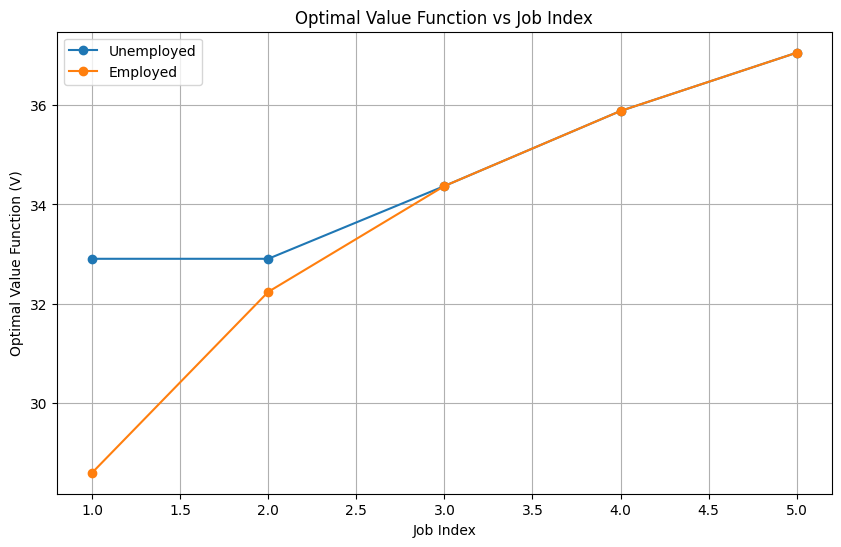

In [7]:
import matplotlib.pyplot as plt

def plot_value_function(V, n):
    # Plot the value function for both employed and unemployed states.
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), V[0, :], label="Unemployed", marker='o')
    plt.plot(range(1, n+1), V[1, :], label="Employed", marker='o')
    plt.xlabel('Job Index')
    plt.ylabel('Optimal Value Function (V)')
    plt.title('Optimal Value Function vs Job Index')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_value_function(V, n)

### Part (D)

#### Patterns and Observations:  

If we classify the jobs purely based on their wages, we see that the lower-paying jobs are rejected, while the higher-paying ones are accepted. The threshold between acceptance and rejection simply shifts based on the worker's preferences and external factors. When we increase the probability of job loss ($\alpha$), the threshold for accepting a job decreases. This means that, with higher job insecurity, the worker becomes more cautious and more likely to reject lower-paying offers, as they are aware that losing the job might result in a less favorable outcome. Conversely, when we increase the discount factor ($\gamma$), the threshold for accepting a job increases. This indicates that, with a higher preference for future rewards, the worker is more willing to accept lower-paying jobs today in exchange for the potential long-term benefits of securing stable employment.

This behavior illustrates a form of risk aversion. When job loss is more likely (higher $\alpha$), workers tend to prefer the stability of unemployment unless the job offers a significantly higher wage, since the risk of losing the job in the short term outweighs the potential for future rewards. On the other hand, the long-term vs short-term trade-off is also evident. A high discount factor ($\gamma$) makes workers more inclined to accept a lower-paying job today, as they place greater value on future rewards. With a lower $\gamma$, they are more focused on immediate returns, and are less likely to accept jobs unless the wages are sufficient in the short run.


## Question 5: Manual Value Iteration (Led by ______)

Consider a simple MDP with $\mathcal{S} = \{s_1, s_2, s_3\}, \mathcal{T} = \{s_3\}, \mathcal{A} = \{a_1, a_2\}$. The State Transition Probability function  
$$\mathcal{P}: \mathcal{N} \times \mathcal{A} \times \mathcal{S} \rightarrow [0, 1]$$  
is defined as:  
$$\mathcal{P}(s_1, a_1, s_1) = 0.25, \mathcal{P}(s_1, a_1, s_2) = 0.65, \mathcal{P}(s_1, a_1, s_3) = 0.1$$  
$$\mathcal{P}(s_1, a_2, s_1) = 0.1, \mathcal{P}(s_1, a_2, s_2) = 0.4, \mathcal{P}(s_1, a_2, s_3) = 0.5$$  
$$\mathcal{P}(s_2, a_1, s_1) = 0.3, \mathcal{P}(s_2, a_1, s_2) = 0.15, \mathcal{P}(s_2, a_1, s_3) = 0.55$$  
$$\mathcal{P}(s_2, a_2, s_1) = 0.25, \mathcal{P}(s_2, a_2, s_2) = 0.55, \mathcal{P}(s_2, a_2, s_3) = 0.2$$  

The Reward Function  
$$\mathcal{R}: \mathcal{N} \times \mathcal{A} \rightarrow \mathbb{R}$$  
is defined as:  
$$\mathcal{R}(s_1, a_1) = 8.0, \mathcal{R}(s_1, a_2) = 10.0$$  
$$\mathcal{R}(s_2, a_1) = 1.0, \mathcal{R}(s_2, a_2) = -1.0$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer

We initialize the value function as:

$$
v_0(s_1) = 10.0, \quad v_0(s_2) = 1.0, \quad v_0(s_3) = 0.0.
$$

The value iteration update equation is:

$$
v_k(s) = \max_a \left[ \mathcal{R}(s, a) + \gamma \sum_{s'} \mathcal{P}(s, a, s') v_{k-1}(s') \right].
$$

#### First iteration :



$$
v_1(s_1) = \max(q_1(s_1, a_1), q_1(s_1, a_2)) = \max(11.15, 11.4) = 11.4.
$$
$$
v_1(s_2) = \max(q_1(s_2, a_1), q_1(s_2, a_2)) = \max(4.15, 2.05) = 4.15.
$$
$$
v_1(s_3) = 0.0.
$$
And the the greedy policy can be compute as $
\pi_1(s_1) = a_2, \quad \pi_1(s_2) = a_1, \quad \pi_1(s_3) = \text{N/A (terminal)}.
$

#### Second iteration :
$$
v_2(s_1) = \max(q_2(s_1, a_1), q_2(s_1, a_2)) = \max(13.5475, 12.8) = 13.5475.
$$
$$
v_2(s_2) = \max(q_2(s_2, a_1), q_2(s_2, a_2)) = \max(5.0425, 4.1325) = 5.0425.
$$
$$
v_2(s_3) = 0.0.
$$

And the the greedy policy can be compute as $\pi_2(s_1) = a_1, \quad \pi_2(s_2) = a_1, \quad \pi_2(s_3) = \text{N/A (terminal)}$.






### Part (B) Answer:  


### Part (C) Answer:  

We know that we have $\pi^*(s) = a_1$ so we must have $v^* = R(a_1)+P(a_1)v^*$, which leads to $v^* = (I_2-P(a_1))^{-1}R(a_1)$, and finally we have $v^*(s_1) = 16.8361$ and $v^*(s_2) = 7.11865$

### Part (D) Answer

#### Value Iteration:  

We initialize the value function as:

$$
v_0(s_1) = 10.0, \quad v_0(s_2) = 1.0, \quad v_0(s_3) = 0.0.
$$

The value iteration update equation is:

$$
v_k(s) = \max_a \left[ \mathcal{R}(s, a) + \gamma \sum_{s'} \mathcal{P}(s, a, s') v_{k-1}(s') \right].
$$

#### First iteration :


$$
v_1(s_1) = \max(q_1(s_1, a_1), q_1(s_1, a_2)) = \max(11.15, 12.4) = 12.4.
$$
$$
v_1(s_2) = \max(q_1(s_2, a_1), q_1(s_2, a_2)) = \max(4.15, 2.05) = 4.15.
$$
$$
v_1(s_3) = 0.0.
$$





#### Optimal Deterministic Policy:  

We see that the greedy policy at iteration $1$ is $\pi_1(s_1) = a_2$ and $\pi_1(s_2) = a_1$, hence it will change the final policy because this time $\pi_k(s_1)$ remains $a_2$

## Question 6: Fixed-Point and Policy Evaluation True/False Questions (Led by ______)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  

True, we know that $Q^\pi(s,a) = R(s,a)+\gamma\sum_{s'}P(s,a,s')V^\pi(s')$, hence if $R(s,a)$ is increased by $2$ then $Q^\pi(s,a)$ is also increased by $2$.

#### Question 2:  

True, we have $G_t = 5+0.9*3+0.9^2*1 = 8.51\geq 6$

#### Question 3:  

True, we have $||B^pi(X)-B^\pi(Y)||_\infty\leq \gamma||X-Y||_\infty$

#### Question 4:  

False, in Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ is at least as good as the previous policy $\pi$, but it does not always perform strictly better. If the current policy is already optimal, the policy improvement step will not change the policy.


#### Question 5:  

True, if $Q^\pi(s,a) = 10$ for all actions $a$, then $V^\pi(s) = \sum\pi(s,a)Q^\pi(s,a) = 10\sum\pi(s,a)=10$

#### Question 6:  

True, if $\gamma <1$ and $R_t$ are bounded then $G_t$ converges.